<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.4 - PCA Lab

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.

# Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [ ]:
# Reference https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [34]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [7]:
breast_cancer_csv = '../DATA/breast-cancer-wisconsin-data.csv'
df = pd.read_csv(breast_cancer_csv)
df.drop(columns=['Unnamed: 32'], inplace=True)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# EDA 

Explore dataset. Clean data. Find correlation. 

# Subset & Normalize

Subset the data to only include all columns except diagnosis. We will be comparing the principal components to age specifically, so we are leaving age out.

In [40]:
# ANSWER
feat = df.columns[2:]
X = df[feat]
y = df['diagnosis']

# Standarize X
scale = StandardScaler()
bc_feat_ss = scale.fit_transform(X, y)


In [31]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [32]:
scaled_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

# Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

<AxesSubplot:>

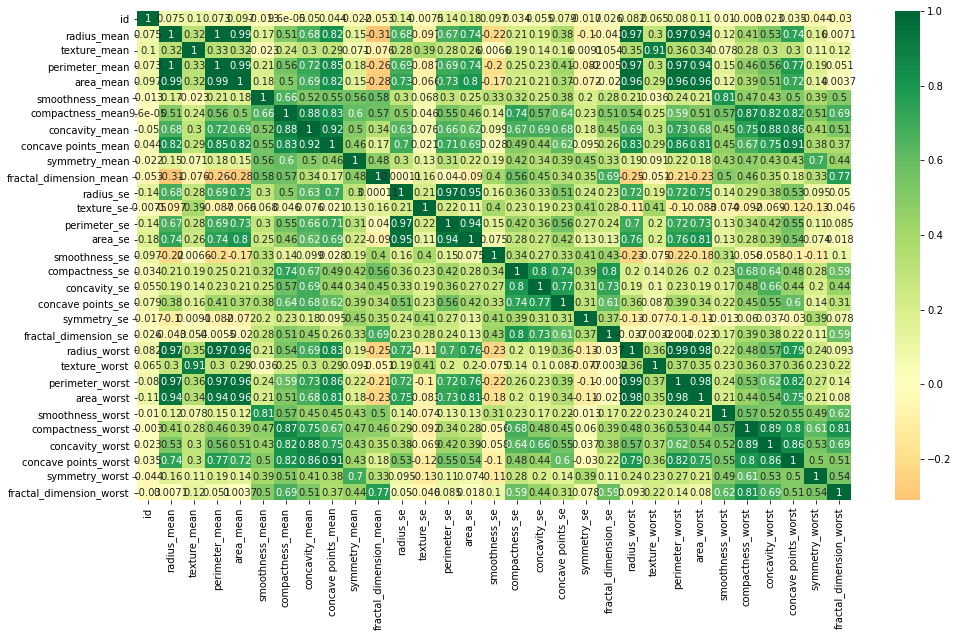

In [9]:
# ANSWER
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

## Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [16]:
# ANSWER
correlation_matrix = df.corr()
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
eigenvalues, eigenvectors

(array([1.32880574e+01, 5.69680537e+00, 2.83539505e+00, 1.98135718e+00,
        1.64881531e+00, 1.23467271e+00, 9.78273239e-01, 6.71752969e-01,
        4.60792428e-01, 4.03133096e-01, 3.49154976e-01, 2.93890434e-01,
        2.61146925e-01, 2.41330214e-01, 1.56973649e-01, 9.41285258e-02,
        7.98099486e-02, 5.90462723e-02, 5.25911946e-02, 4.91219277e-02,
        3.10707842e-02, 2.99412056e-02, 2.74305238e-02, 2.42490222e-02,
        1.80393609e-02, 1.54797297e-02, 8.17169884e-03, 6.89810286e-03,
        1.33040206e-04, 7.48376054e-04, 1.58933755e-03]),
 array([[-2.29121629e-02, -3.40684907e-02, -9.69384357e-02,
         -2.65980453e-02, -1.13275871e-02, -3.16733438e-01,
         -9.07115632e-01,  9.63624150e-02,  1.49115642e-01,
          1.69267515e-01, -5.81889971e-02, -6.72125159e-03,
          4.84108383e-03, -6.50009912e-03, -6.88594292e-03,
         -2.75349185e-03,  7.77998301e-03, -1.97073716e-02,
          5.44224782e-03,  2.04549082e-02,  9.87091673e-03,
         -6.195706

## Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues. 

The explained variance tells us how much information (variance) is captured by each principal component.

$$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

In [24]:
def calculate_cum_var_exp(eig_vals):
    '''
    Calculate Explained Variance from Eigenvalues
    
    Return a list or array containing the cumulative explained variance 
    '''
    var_score = 0
    cum_var_exp=[]
    for val in eig_vals:
        var_score += (val/sum(eig_vals))*100
        cum_var_exp.append(var_score)
    return cum_var_exp

In [25]:
calculate_cum_var_exp(eigenvalues)

[42.864701335977664,
 61.24149284660222,
 70.38792848566929,
 76.77940324830814,
 82.09816229694582,
 86.08097748343738,
 89.23669760942612,
 91.40364266928964,
 92.89006985522977,
 94.19049919801402,
 95.31680557191976,
 96.26483922843097,
 97.10724866325977,
 97.885733225708,
 98.39209983609484,
 98.69574024191995,
 98.95319168891423,
 99.14366353489736,
 99.31331254965467,
 99.4717703808151,
 99.57199871704395,
 99.66858325133245,
 99.7570688119878,
 99.83529146430192,
 99.89348295098935,
 99.94341756287642,
 99.96977788171532,
 99.99202982642952,
 99.99245898838585,
 99.99487310469017,
 100.00000000000004]

In [17]:
def plot_var_exp(eig_vals):
    
    cum_var_exp = calculate_cum_var_exp(eig_vals)
    
    plt.figure(figsize=(9,7))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,30])
    ax.set_ylim([-5,105])

    ax.set_ylabel('Cumulative Variance Explained (%)', fontsize=16)
    ax.set_xlabel('No. of Components', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    ax.set_title('Component vs Cumulative Variance Explained\n', fontsize=20)

    plt.show()

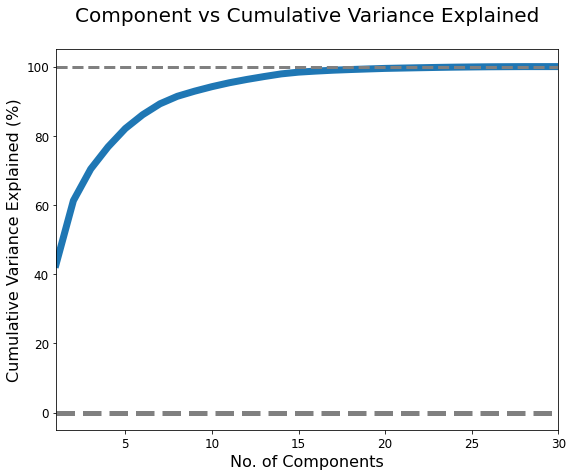

In [29]:
plot_var_exp(eigenvalues)

# Using sklearn For PCA

    from sklearn.decomposition import PCA
    
- Create an instance of PCA
- Fit X
- Plot the explained variance
- Define n_components
    - n_component
- Apply dimensionality reduction to X
    - transform
- Create PairPlot of PCA

In [20]:
# ANSWER
# Create an instance of PCA
pca = PCA(n_components=1)
# Fit Xs
pca.fit(X)


PCA(n_components=2)

In [0]:
# ANSWER
# Plot explained_variance_

In [26]:
# ANSWER
# Apply dimensionality reduction to Xs using transform
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:     ", X.shape)
print("transformed shape:     ", X_pca.shape)

original shape:      (569, 30)
transformed shape:      (569, 1)


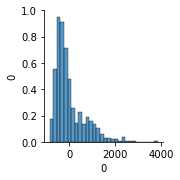

In [28]:
# ANSWER
# Create PairPlot of PCA
X_pca_df = pd.DataFrame(X_pca)
sns.pairplot(X_pca_df)

## Split Data to 80/20 and Use PCA you gon in 6 as X

Split data 80/20 and Use KNN to find score.

In [42]:
# ANSWER
# Split Data
pca = PCA (n_components=6, random_state=42)
x_pca = pca.fit_transform(bc_feat_ss)
X_train, X_test, y_train, y_test = train_test_split(x_pca, df['diagnosis'], test_size=0.3, random_state=42)

In [ ]:
X = bc_feat
y = df['diagnosis']

Text(0.5, 0, 'No of Neighbors')

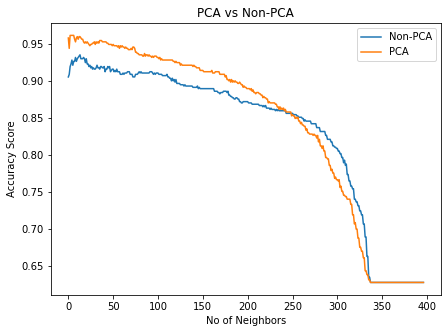

In [45]:
# ANSWER
scoring = []
for k in range(1, len(X_train)):
    knn = KNeighborsClassifier(n_neighbors=k)
    mean = np.mean(cross_val_score(knn,X,y))
    scoring.append(mean)
    
scoring_ss = []
for k in range(1, len(X_train)):
    knn = KNeighborsClassifier(n_neighbors=k)
    mean = np.mean(cross_val_score(knn,x_pca,y))
    scoring_ss.append(mean)
    
plt.figure(figsize = (7,5))
sns.color_palette('dark')
sns.lineplot(x=np.arange(len(X_train)-1), y=scoring, label = 'Non-PCA')
sns.lineplot(x=np.arange(len(X_train)-1), y=scoring_ss, label = 'PCA')

plt.title('PCA vs Non-PCA')
plt.ylabel('Accuracy Score')
plt.xlabel('No of Neighbors')

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Breast Cancer Machine Learning Prediction](https://gtraskas.github.io/post/breast_cancer/)

[Understanding PCA (Principal Component Analysis) with Python](https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21)